In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sp_data = pd.read_csv('C:\\Users\\cocob\\Downloads\\A191RL1Q225SBEA.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.A191RL1Q225SBEA, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)

In [6]:
sp_data.head()

,DATE,A191RL1Q225SBEA,price
0,1947-04-01,-1.0,-1.0
1,1947-07-01,-0.8,-0.8
2,1947-10-01,6.4,6.4
3,1948-01-01,6.2,6.2
4,1948-04-01,6.8,6.8


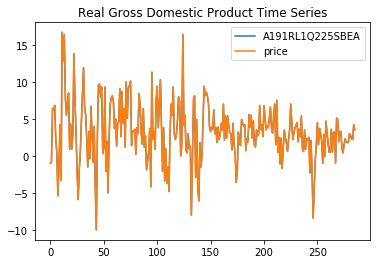

In [8]:
sp_data.plot()
plt.title('Real Gross Domestic Product')
plt.show()

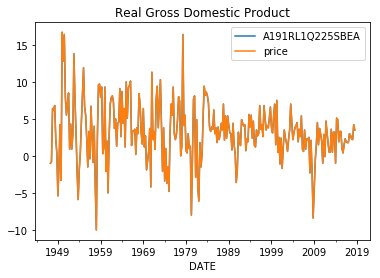

In [10]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('Real Gross Domestic Product')
plt.show()

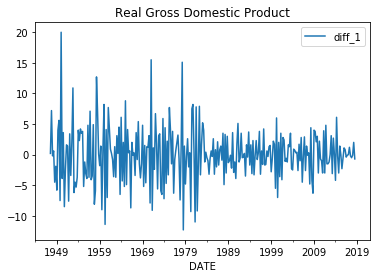

In [11]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('Real Gross Domestic Product')
plt.show()

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5,1,'RGDP')

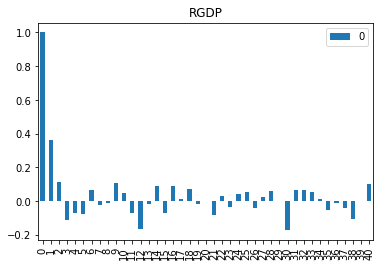

In [12]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("RGDP")

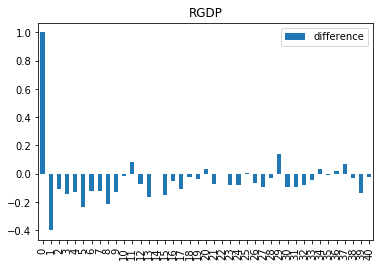

In [13]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("RGDP")
plt.legend(['difference'])

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,1,0))
model_fit = model.fit()
#print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

Residuals Description
count    2.850000e+02
mean     1.324477e-17
std      4.373383e+00
min     -1.231579e+01
25%     -3.015789e+00
50%     -1.578947e-02
75%      2.584211e+00
max      1.998421e+01
dtype: float64


In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  286
Model:                     ARMA(1, 0)   Log Likelihood                -772.099
Method:                       css-mle   S.D. of innovations              3.598
Date:                Mon, 29 Oct 2018   AIC                           1550.199
Time:                        16:52:49   BIC                           1561.167
Sample:                    04-01-1947   HQIC                          1554.595
                         - 07-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2126      0.332      9.681      0.000       2.562       3.863
ar.L1.price     0.3601      0.055      6.530      0.000       0.252       0.468
                                    Roots       

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float)

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  286
Model:                     ARMA(1, 1)   Log Likelihood                -771.014
Method:                       css-mle   S.D. of innovations              3.585
Date:                Mon, 29 Oct 2018   AIC                           1550.028
Time:                        16:52:59   BIC                           1564.652
Sample:                    04-01-1947   HQIC                          1555.890
                         - 07-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2096      0.360      8.922      0.000       2.504       3.915
ar.L1.price     0.5152      0.105      4.915      0.000       0.310       0.721
ma.L1.price    -0.1748      0.114     -1.537    

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float)

In [18]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  285
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -770.387
Method:                       css-mle   S.D. of innovations              3.581
Date:                Mon, 29 Oct 2018   AIC                           1548.774
Time:                        16:53:20   BIC                           1563.384
Sample:                    07-01-1947   HQIC                          1554.631
                         - 07-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0077      0.004     -1.984      0.048      -0.015   -9.27e-05
ar.L1.D.price     0.3451      0.056      6.165      0.000       0.235       0.455
ma.L1.D.price    -1.0000      0.009   -1

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [19]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: Converge

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  285
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -759.297
Method:                       css-mle   S.D. of innovations              3.402
Date:                Mon, 29 Oct 2018   AIC                           1542.594
Time:                        16:53:31   BIC                           1586.424
Sample:                    07-01-1947   HQIC                          1560.164
                         - 07-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0078      0.004     -2.030      0.043      -0.015      -0.000
ar.L1.D.price    -1.1626      0.060    -19.336      0.000      -1.280      -1.045
ar.L2.D.price    -0.7397      0.088     

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
